# Air Analysis

## Team Names

- Antonio Aldair Gonzalez Serrano
- Luis Esteban Barranco Guida
- Luis Gerardo Guzmán Rojas
- Miguel Ángel Ramírez García
- Uzmar de Jesús Gómez Yáñez

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import anderson
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm

In [2]:
dfpa15 = pd.DataFrame(pd.read_excel(open('Files/presion_2015PA.xls','rb'), sheet_name='2015PA'))
dfpm2515 = pd.DataFrame(pd.read_excel(open('Files/2015PM25.xls','rb'), sheet_name='2015PM25'))
dfrh15 = pd.DataFrame(pd.read_excel(open('Files/2015RH.xls','rb'), sheet_name='2015RH'))
dftmp15 = pd.DataFrame(pd.read_excel(open('Files/2015TMP.xls','rb'), sheet_name='2015TMP'))
dfwdr15 = pd.DataFrame(pd.read_excel(open('Files/2015WDR.xls','rb'), sheet_name='2015WDR'))
dfwsp15 = pd.DataFrame(pd.read_excel(open('Files/2015WSP.xls','rb'), sheet_name='2015WSP'))
dfo315 = pd.DataFrame(pd.read_excel(open('Files/2015O3.xls','rb'), sheet_name='2015O3'))
dfnox15 = pd.DataFrame(pd.read_excel(open('Files/2015NOX.xls','rb'), sheet_name='2015NOX'))
dfno215 = pd.DataFrame(pd.read_excel(open('Files/2015NO2.xls','rb'), sheet_name='2015NO2'))
dfno15 = pd.DataFrame(pd.read_excel(open('Files/2015NO.xls','rb'), sheet_name='2015NO'))
dfco15 = pd.DataFrame(pd.read_excel(open('Files/2015CO.xls','rb'), sheet_name='2015CO'))
dfso215 = pd.DataFrame(pd.read_excel(open('Files/2015SO2.xls','rb'), sheet_name='2015SO2'))

In [3]:
dfpa16 = pd.DataFrame(pd.read_excel(open('Files/2016PA.xls','rb'), sheet_name='2016PA'))
dfpm2516 = pd.DataFrame(pd.read_excel(open('Files/2016PM25.xls','rb'), sheet_name='2016PM25'))
dfrh16= pd.DataFrame(pd.read_excel(open('Files/2016RH.xls','rb'), sheet_name='2016RH'))
dftmp16 = pd.DataFrame(pd.read_excel(open('Files/2016TMP.xls','rb'), sheet_name='2016TMP'))
dfwdr16 = pd.DataFrame(pd.read_excel(open('Files/2016WDR.xls','rb'), sheet_name='2016WDR'))
dfwsp16 = pd.DataFrame(pd.read_excel(open('Files/2016WSP.xls','rb'), sheet_name='2016WSP'))
dfo316 = pd.DataFrame(pd.read_excel(open('Files/2016O3.xls','rb'), sheet_name='2016O3'))
dfnox16 = pd.DataFrame(pd.read_excel(open('Files/2016NOX.xls','rb'), sheet_name='2016NOX'))
dfno216 = pd.DataFrame(pd.read_excel(open('Files/2016NO2.xls','rb'), sheet_name='2016NO2'))
dfno16 = pd.DataFrame(pd.read_excel(open('Files/2016NO.xls','rb'), sheet_name='2016NO'))
dfco16 = pd.DataFrame(pd.read_excel(open('Files/2016CO.xls','rb'), sheet_name='2016CO'))
dfso216 = pd.DataFrame(pd.read_excel(open('Files/2016SO2.xls','rb'), sheet_name='2016SO2'))

In [4]:
dfpa17 = pd.DataFrame(pd.read_excel(open('Files/presion_2017PA.xls','rb'), sheet_name='2017PA'))
dfpm2517 = pd.DataFrame(pd.read_excel(open('Files/2017PM25.xls','rb'), sheet_name='2017PM25'))
dfrh17= pd.DataFrame(pd.read_excel(open('Files/2017RH.xls','rb'), sheet_name='2017RH'))
dftmp17 = pd.DataFrame(pd.read_excel(open('Files/2017TMP.xls','rb'), sheet_name='2017TMP'))
dfwdr17 = pd.DataFrame(pd.read_excel(open('Files/2017WDR.xls','rb'), sheet_name='2017WDR'))
dfwsp17 = pd.DataFrame(pd.read_excel(open('Files/2017WSP.xls','rb'), sheet_name='2017WSP'))
dfo317 = pd.DataFrame(pd.read_excel(open('Files/2017O3.xls','rb'), sheet_name='2017O3'))
dfnox17 = pd.DataFrame(pd.read_excel(open('Files/2017NOX.xls','rb'), sheet_name='2017NOX'))
dfno217 = pd.DataFrame(pd.read_excel(open('Files/2017NO2.xls','rb'), sheet_name='2017NO2'))
dfno17 = pd.DataFrame(pd.read_excel(open('Files/2017NO.xls','rb'), sheet_name='2017NO'))
dfco17 = pd.DataFrame(pd.read_excel(open('Files/2017CO.xls','rb'), sheet_name='2017CO'))
dfso217 = pd.DataFrame(pd.read_excel(open('Files/2017SO2.xls','rb'), sheet_name='2017SO2'))

In [5]:
station="PED"

In [6]:
df15 = pd.concat([dfpa15["FECHA"],dfpa15["HORA"],dfrh15[station],dfwdr15[station],dfwsp15[station],
                  dfpm2515[station],dfo315[station],dfnox15[station],dfno215[station],dfno15[station],dfco15[station],
                  dfso215[station],dftmp15[station]],axis=1,ignore_index=True)
df15.rename(columns={0:"FECHA",1:"HORA",2:"HUMEDAD",3:"WDIR",4:"WVEL",5:"PM25",6:"O3",7:"NOX",
                     8:"NO2",9:"NO",10:"CO",11:"SO",12:"TEMP"},inplace=True)
df15.head()

,FECHA,HORA,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
0,2015-01-01,1,64,211,1.9,123,-99,45,41,4,1.2,10,10.9
1,2015-01-01,2,65,201,1.4,140,-99,51,46,5,1.2,10,10.3
2,2015-01-01,3,69,220,1.5,133,-99,57,48,9,1.3,9,9.5
3,2015-01-01,4,71,191,1.4,133,-99,57,46,11,1.4,7,9.0
4,2015-01-01,5,75,183,0.9,129,-99,60,41,19,1.5,6,8.4


In [7]:
df16 = pd.concat([dfpa16["FECHA"],dfpa16["HORA"],dfrh16[station],dfwdr16[station],dfwsp16[station],
                  dfpm2516[station],dfo316[station],dfnox16[station],dfno216[station],dfno16[station],dfco16[station],
                  dfso216[station],dftmp16[station]],axis=1,ignore_index=True)
df16.rename(columns={0:"FECHA",1:"HORA",2:"HUMEDAD",3:"WDIR",4:"WVEL",5:"PM25",6:"O3",7:"NOX",
                     8:"NO2",9:"NO",10:"CO",11:"SO",12:"TEMP"},inplace=True)
df16.head()

,FECHA,HORA,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
0,2016-01-01,1,-99,-99,-99.0,-99,20,33,30,3,0.9,15,-99.0
1,2016-01-01,2,-99,-99,-99.0,-99,19,30,27,4,0.8,13,-99.0
2,2016-01-01,3,-99,-99,-99.0,-99,12,37,33,4,1.0,11,-99.0
3,2016-01-01,4,-99,-99,-99.0,-99,11,38,34,5,1.0,9,-99.0
4,2016-01-01,5,-99,-99,-99.0,-99,3,57,39,18,1.3,8,-99.0


In [8]:
df17 = pd.concat([dfpa17["Fecha"],dfpa17["Hora"],dfrh17[station],dfwdr17[station],dfwsp17[station],
                  dfpm2517[station],dfo317[station],dfnox17[station],dfno217[station],dfno17[station],dfco17[station],
                  dfso217[station],dftmp17[station]],axis=1,ignore_index=True)
df17.rename(columns={0:"FECHA",1:"HORA",2:"HUMEDAD",3:"WDIR",4:"WVEL",5:"PM25",6:"O3",7:"NOX",
                     8:"NO2",9:"NO",10:"CO",11:"SO",12:"TEMP"},inplace=True)
df17.head()

,FECHA,HORA,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
0,2017-01-01,1,64,229,2.3,-99,19,19,17,2,0.6,1,12.9
1,2017-01-01,2,66,235,1.1,-99,14,21,19,2,0.6,1,12.4
2,2017-01-01,3,67,231,1.1,-99,4,40,32,8,0.9,2,12.6
3,2017-01-01,4,69,217,1.3,-99,4,41,33,8,1.0,2,12.4
4,2017-01-01,5,68,216,1.2,-99,12,26,22,4,0.8,1,11.7


In [9]:
df = pd.concat([df15, df16, df17])
df.shape

(26304, 13)

In [10]:
df2 = df.resample('W', on='FECHA').median()
df2.index = df2.index + pd.DateOffset(1)

In [11]:
df2.tail()

,HORA,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
FECHA,,,,,,,,,,,,
2017-12-04,12.5,46.5,216.0,1.60,-99.0,20.5,43.0,36.0,4.0,0.7,8.0,12.45
2017-12-11,12.5,42.5,214.0,1.70,-99.0,22.0,39.0,31.0,3.0,0.5,6.0,13.55
2017-12-18,12.5,32.0,124.5,1.25,-99.0,7.0,31.0,25.0,2.0,0.4,3.0,11.00
2017-12-25,12.5,46.0,218.5,1.70,-99.0,23.0,36.0,31.5,2.0,0.5,4.0,15.05
2018-01-01,12.5,48.5,216.5,1.50,-99.0,21.0,28.0,25.0,2.0,0.4,6.0,13.40


In [12]:
df2.drop(df2.tail(1).index,inplace=True)

In [13]:
base = df2.copy()
base = base[["HUMEDAD","WDIR","WVEL","PM25","O3","NOX","NO2","NO","CO","SO","TEMP"]]

In [14]:
base.head()

,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
FECHA,,,,,,,,,,,
2015-01-05,53.0,216.0,1.60,10.0,-99.0,26.5,21.0,5.0,0.40,2.0,12.25
2015-01-12,62.0,300.0,2.00,7.5,-99.0,30.0,23.0,5.0,0.30,2.0,10.65
2015-01-19,47.5,208.5,1.55,26.0,29.5,37.0,32.0,3.0,0.45,3.0,13.45
2015-01-26,48.0,210.0,1.60,22.5,23.5,32.0,26.5,4.0,0.30,2.0,14.55
2015-02-02,42.0,216.0,1.70,11.0,17.0,33.0,25.5,5.0,0.30,3.0,13.25


In [15]:
for i in base.columns:
    base[i].replace(to_replace=-99.0,value=base[base[i]!=-99.0][i].median(),regex=True,inplace=True)

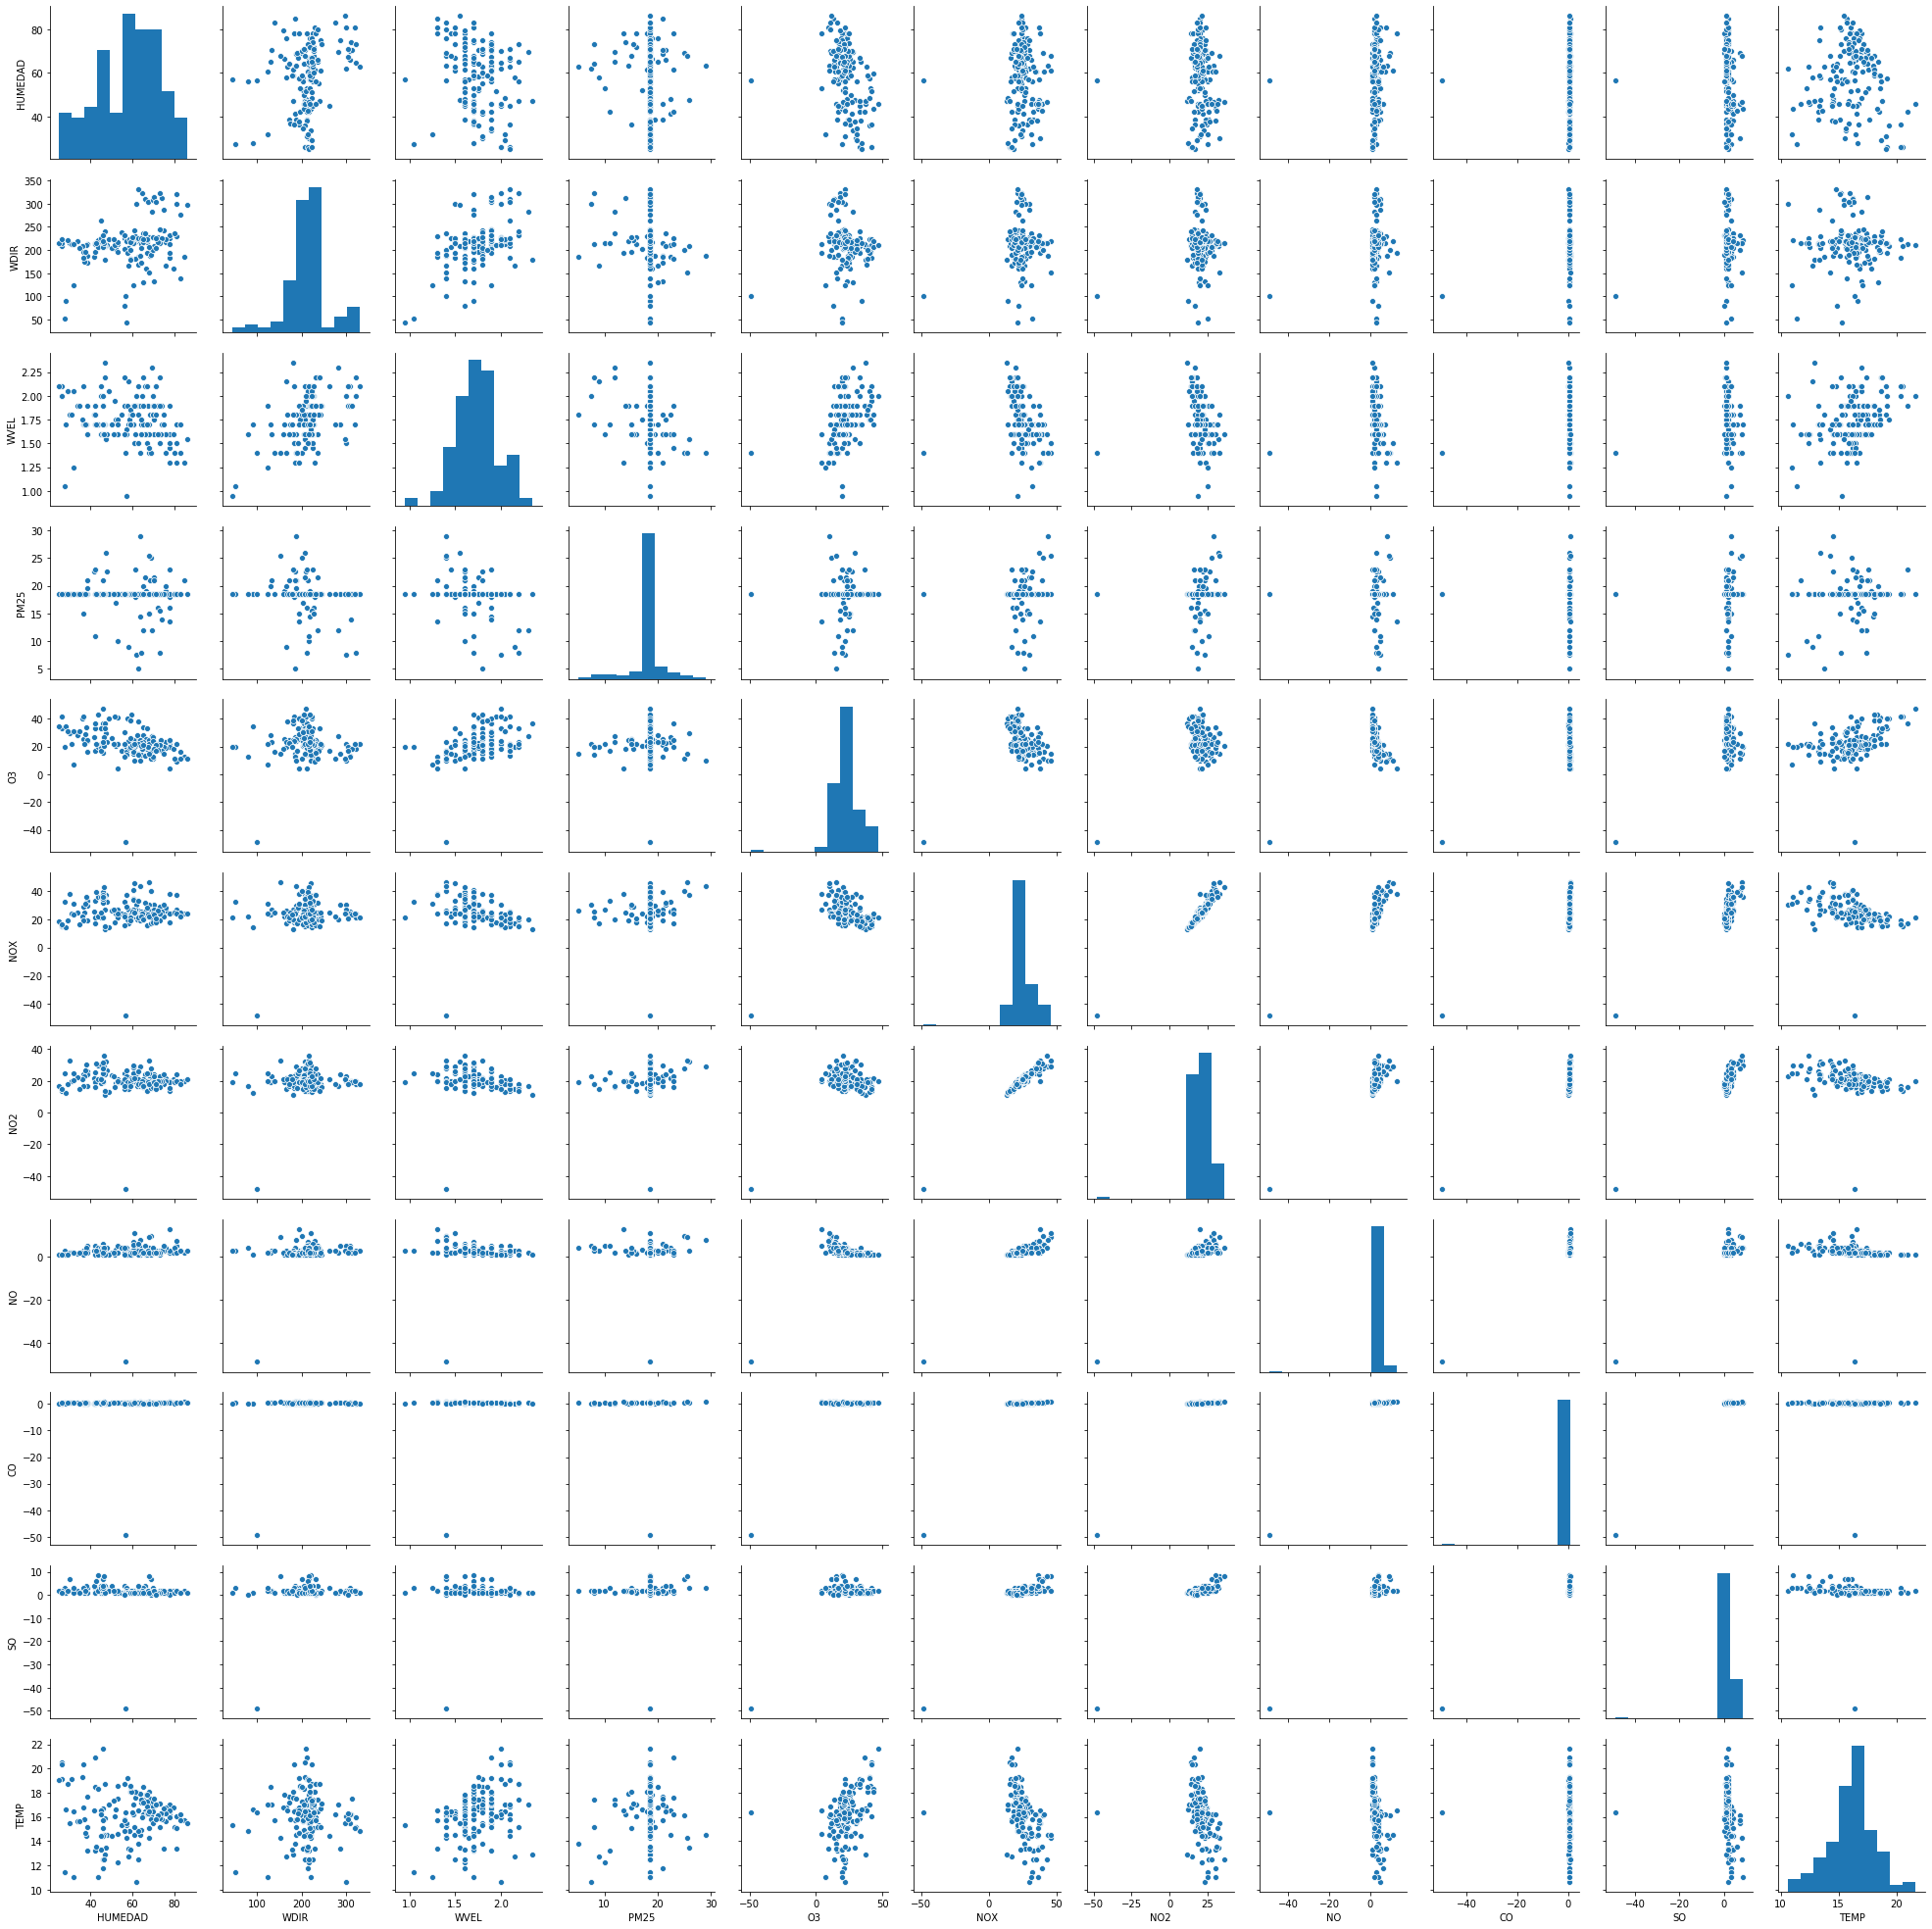

In [16]:
sns.pairplot(base)

In [17]:
base.to_csv(r'Files/basefinal.csv')

## Linear Regression

### Making the correlation matrix

In [23]:
df = pd.read_csv(r'Files/basefinal.csv')

cm = df.corr().round(2)

We can see that the features don't have a linear correlation with the target, also the wind's direction and wind's speed are linear correlated.

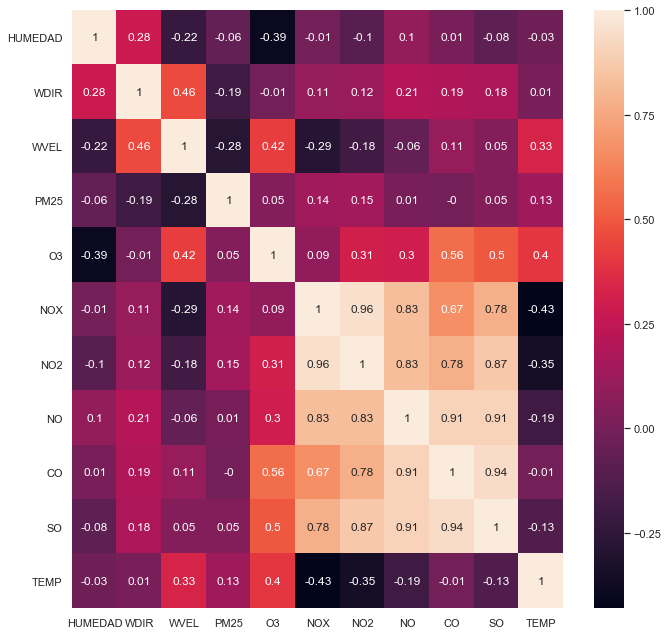

In [31]:
sns.set(rc = {'figure.figsize':(11,11)})
sns.heatmap(data =cm.iloc[0:11,0:11], annot = True)

In [27]:
df.describe()

,PRESION,HUMEDAD,WDIR,WVEL,MCM,PM25,TEMP
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,585.291667,50.730769,225.717949,1.476603,24.140064,21.403846,16.906410
std,0.940073,12.071345,63.936263,0.357248,15.632417,7.687047,1.808526
min,583.000000,17.000000,45.500000,0.600000,0.370000,1.000000,10.500000
25%,585.000000,42.500000,186.875000,1.300000,22.160000,15.000000,16.000000
50%,585.000000,52.000000,247.500000,1.400000,22.160000,20.500000,16.950000
75%,586.000000,59.000000,273.000000,1.600000,22.160000,27.500000,17.637500
max,587.000000,75.000000,305.000000,3.000000,102.230000,39.500000,23.100000


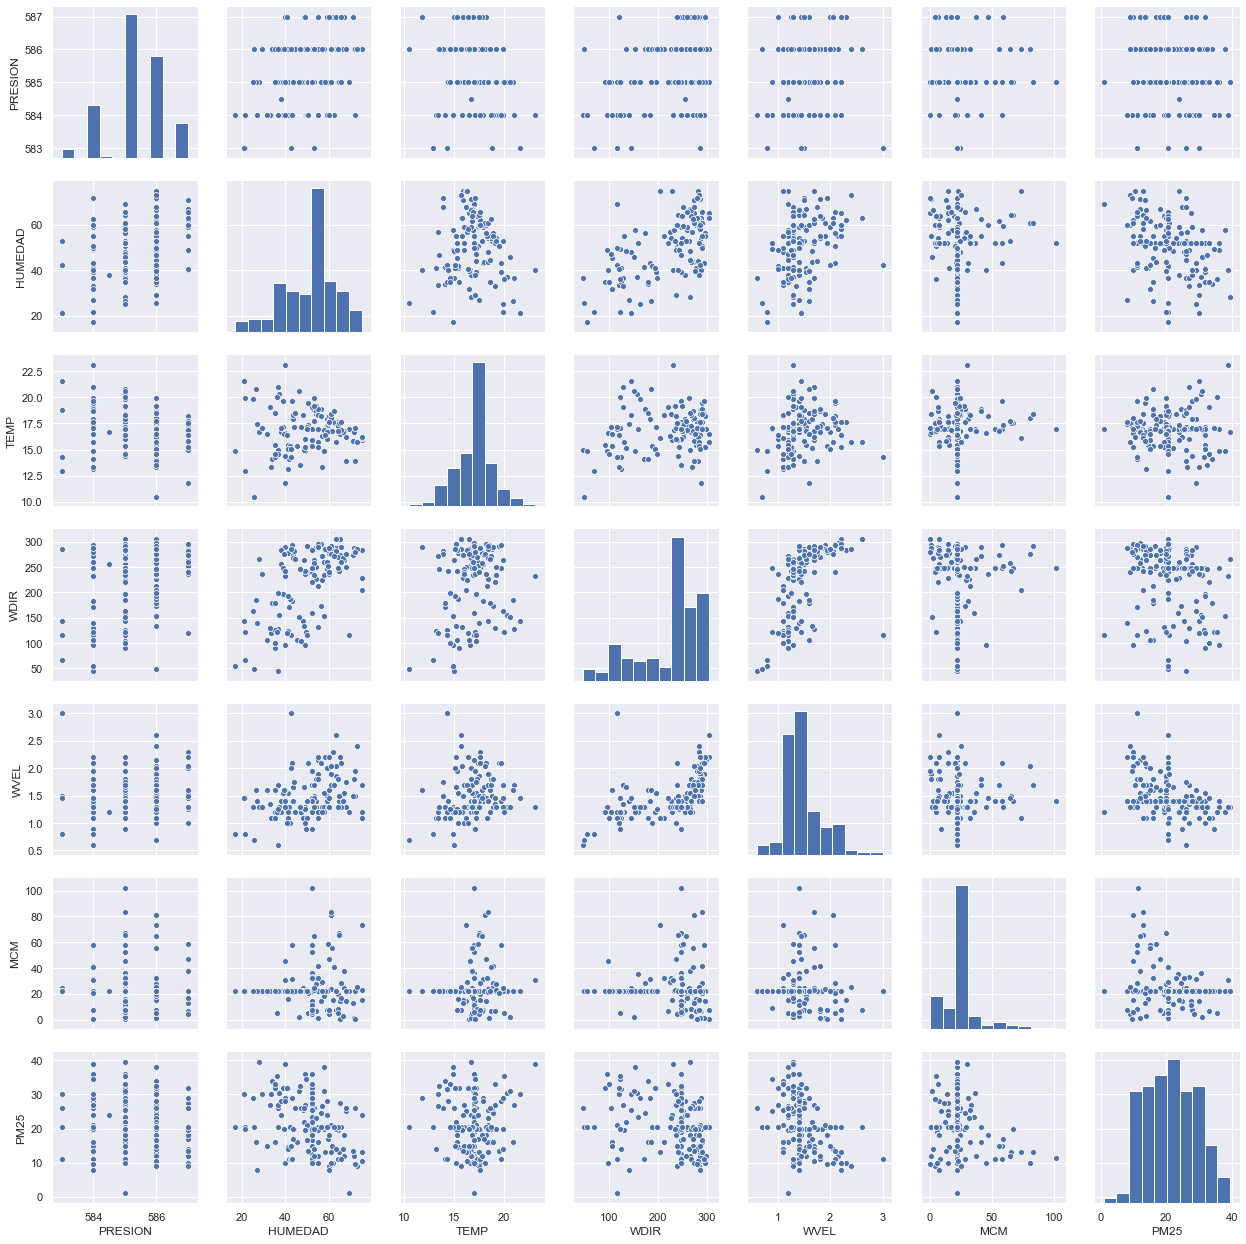

In [28]:
sns.pairplot(df[['PRESION','HUMEDAD','WDIR','WVEL','MCM','PM25','TEMP']])

### ANOVA Table

We kept the features 'HUMEDAD', 'TEMP', 'WVEL', 'MCM' to explain the target 'PM25'

In [47]:
anova = ols('TEMP ~ HUMEDAD + O3 + NO2', data = df).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TEMP   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     38.73
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.19e-18
Time:                        15:11:07   Log-Likelihood:                -281.93
No. Observations:                 156   AIC:                             571.9
Df Residuals:                     152   BIC:                             584.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9804      0.737     20.328      0.000      13.524      16.436
HUMEDAD        0.0228      0.009      2.587      0.011       0.005       0.040
O3             0.1212      0.013      9.119      0.000       0.095       0.147
NO2           -0.1436      0.018     -8.172      0.000      -0.178      -0.109
==============================================================================
Omnibus:                       23.778   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.390
Skew:                          -0.817   Prob(JB):                     2.07e-08
Kurtosis:                       4.666   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We applied the linear model

In [36]:
X = df[['HUMEDAD','O3','NO2']]
y = df['TEMP']

In [37]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predictions= lm.predict(X)

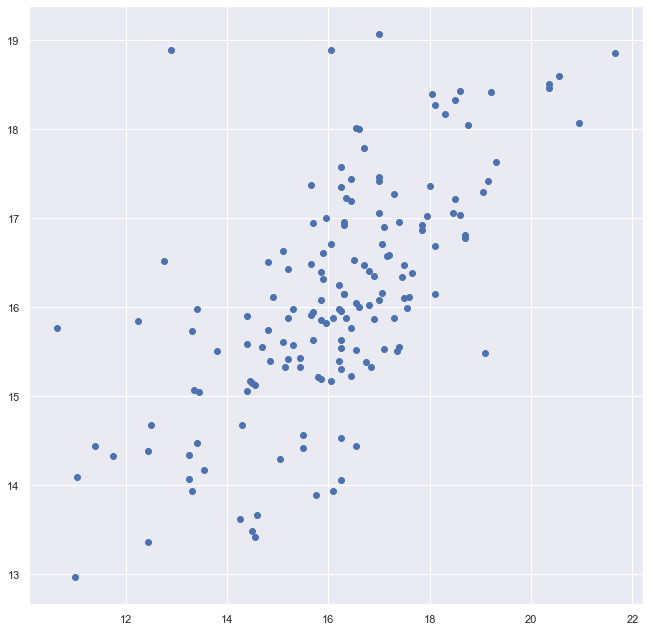

In [39]:
plt.scatter(y,predictions)

In [40]:
print('MAE: ', metrics.mean_absolute_error(y, predictions))

MAE:  1.1429507108285288


### Testing assumptions

#### Normality of the residuals

In [41]:
res = y-predictions

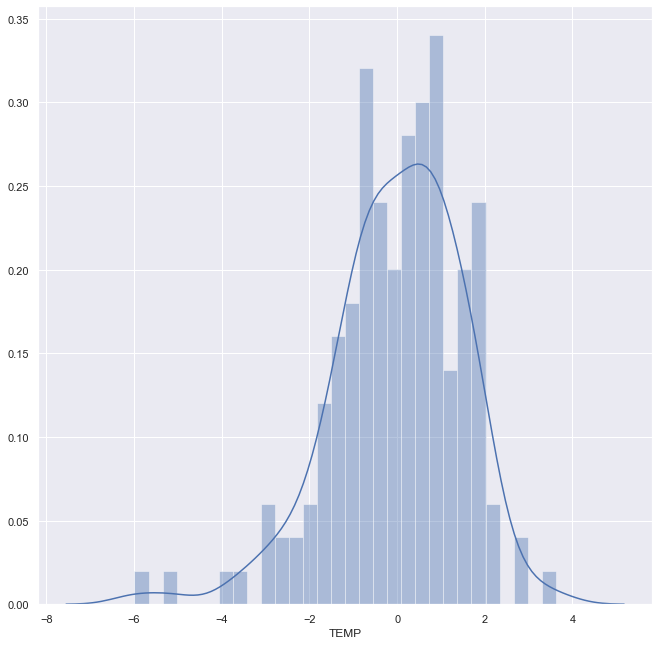

In [42]:
sns.distplot(res, bins=30)

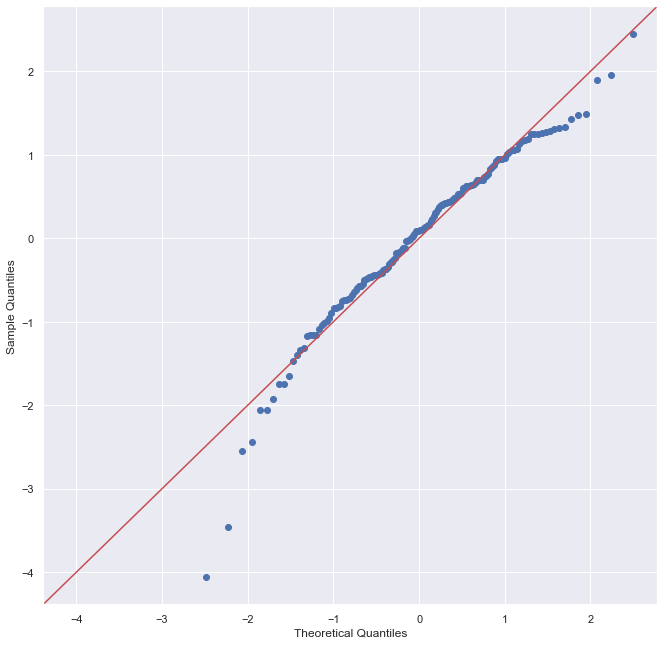

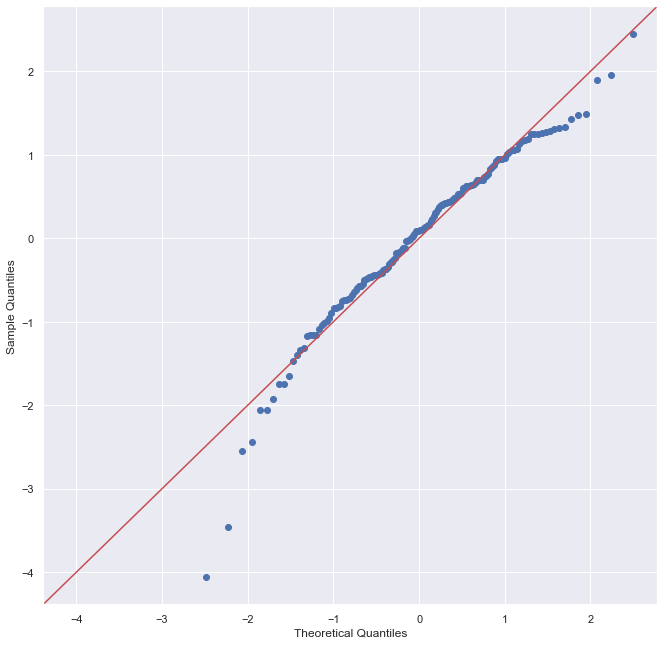

In [44]:
sm.qqplot(res, fit=True, line='45')

In [48]:
print(stats.normaltest(res))
print(stats.anderson(res, dist='norm'))
#Menor 0.05 entonces, la muestra probiene de una d norm, no hay evidencias que idiquen que no sea un d normal
print(stats.shapiro(res)[1])

NormaltestResult(statistic=23.777937394188758, pvalue=6.865726504066238e-06)
AndersonResult(statistic=0.9705694087350594, critical_values=array([0.562, 0.64 , 0.768, 0.896, 1.066]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
0.00041872417205013335


### Homoscedasticity

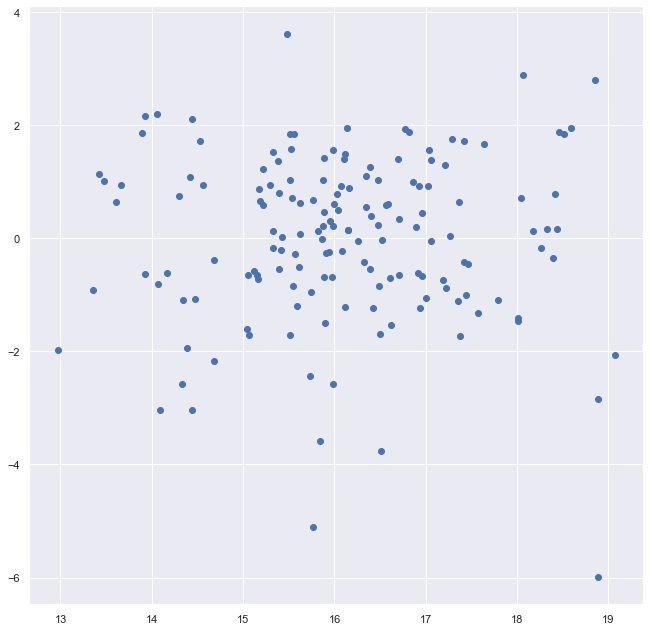

In [51]:
plt.scatter(predictions,res)

#### We conclude that there's no linearity between our features and the target

## Principal Component Analysis

### Uncategorized

In [18]:
base.head()

,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
FECHA,,,,,,,,,,,
2015-01-05,53.0,216.0,1.60,10.0,22.0,26.5,21.0,5.0,0.40,2.0,12.25
2015-01-12,62.0,300.0,2.00,7.5,22.0,30.0,23.0,5.0,0.30,2.0,10.65
2015-01-19,47.5,208.5,1.55,26.0,29.5,37.0,32.0,3.0,0.45,3.0,13.45
2015-01-26,48.0,210.0,1.60,22.5,23.5,32.0,26.5,4.0,0.30,2.0,14.55
2015-02-02,42.0,216.0,1.70,11.0,17.0,33.0,25.5,5.0,0.30,3.0,13.25


In [19]:
basepca=base.copy()
basepca.reset_index(inplace=True)
basepca.drop(columns=["FECHA"],inplace=True)
basepca.head()

,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
0,53.0,216.0,1.60,10.0,22.0,26.5,21.0,5.0,0.40,2.0,12.25
1,62.0,300.0,2.00,7.5,22.0,30.0,23.0,5.0,0.30,2.0,10.65
2,47.5,208.5,1.55,26.0,29.5,37.0,32.0,3.0,0.45,3.0,13.45
3,48.0,210.0,1.60,22.5,23.5,32.0,26.5,4.0,0.30,2.0,14.55
4,42.0,216.0,1.70,11.0,17.0,33.0,25.5,5.0,0.30,3.0,13.25


In [20]:
scaler= StandardScaler()
scaler.fit(basepca.drop(columns='TEMP'))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_data = scaler.transform(basepca.drop(columns='TEMP'))

In [22]:
pca = PCA(n_components=3)

In [23]:
pcaf=pca.fit(scaled_data)

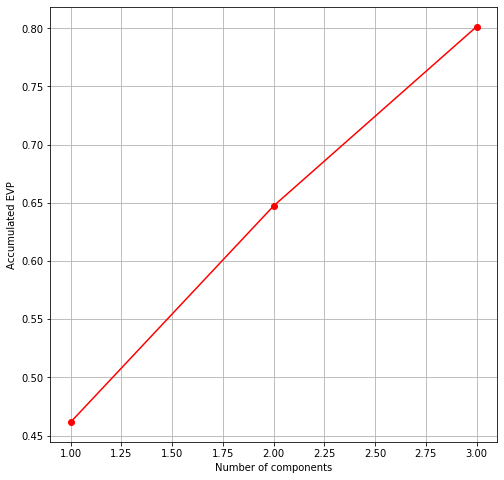

In [24]:
y=pcaf.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8,8))
plt.xlabel('Number of components')
plt.ylabel('Accumulated EVP')
plt.plot(np.arange(1,len(y)+1),y,'ro-')
plt.grid()
plt.show()

In [25]:
x_pca = pca.transform(scaled_data)

In [26]:
pd.DataFrame(x_pca).head()

,0,1,2
0,-0.282700,-0.477274,-0.817495
1,-0.660502,-2.265036,-2.590307
2,-1.720829,1.564330,1.641531
3,-0.960247,1.051831,0.941386
4,-0.869746,-0.355181,-0.466366


In [27]:
scaled_data.shape

(156, 10)

In [28]:
x_pca.shape

(156, 3)

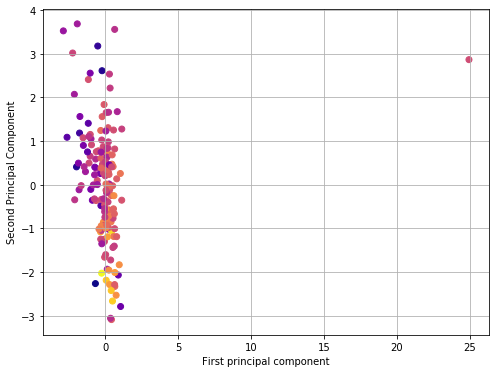

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=basepca['TEMP'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid()

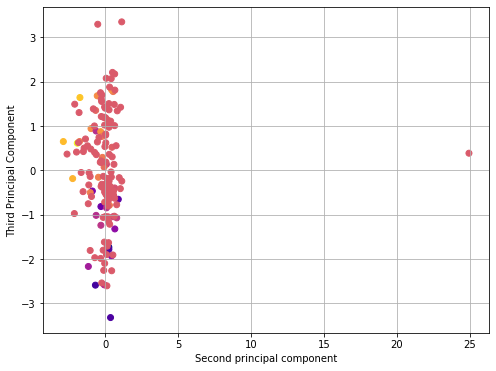

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=basepca['PM25'],cmap='plasma')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.grid()

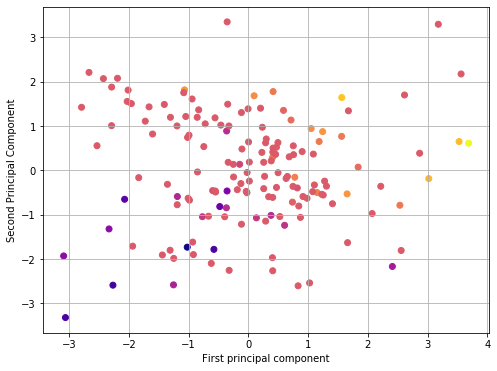

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2],c=basepca['PM25'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid()

### Categorizado

In [31]:
base["TEMP"].describe()

count    156.000000
mean      16.107051
std        1.964897
min       10.650000
25%       15.100000
50%       16.250000
75%       17.162500
max       21.650000
Name: TEMP, dtype: float64

In [32]:
def categoriza(s):
    if s>=10.5 and s<=15.0:
        return "Cold"
    elif s>15 and s<=18:
        return "Warm"
    elif s>18:
        return "Hot"

In [50]:
basepca=base.copy()
basepca.reset_index(inplace=True)
basepca.drop(columns=["FECHA"],inplace=True)
basepca['TEMP']= basepca['TEMP'].apply(categoriza)

In [51]:
basepca.head()

,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
0,53.0,216.0,1.60,10.0,22.0,26.5,21.0,5.0,0.40,2.0,Cold
1,62.0,300.0,2.00,7.5,22.0,30.0,23.0,5.0,0.30,2.0,Cold
2,47.5,208.5,1.55,26.0,29.5,37.0,32.0,3.0,0.45,3.0,Cold
3,48.0,210.0,1.60,22.5,23.5,32.0,26.5,4.0,0.30,2.0,Cold
4,42.0,216.0,1.70,11.0,17.0,33.0,25.5,5.0,0.30,3.0,Cold


In [52]:
features = ['HUMEDAD','WDIR','WVEL',"PM25","O3","NOX","NO2","NO","CO","SO"]

In [53]:
x=basepca.loc[:,features].values
y=basepca.loc[:,['TEMP']].values

In [54]:
x = StandardScaler().fit_transform(x)

In [55]:
pca = PCA(n_components=3)
pC = pca.fit_transform(x)
pdf = pd.DataFrame(data = pC, columns = ['pc1', 'pc2','pc3'])

In [57]:
fdf = pd.concat([pdf, basepca['TEMP']], axis = 1)

In [58]:
fdf.head()

,pc1,pc2,pc3,TEMP
0,-0.282700,-0.477274,-0.817495,Cold
1,-0.660502,-2.265036,-2.590307,Cold
2,-1.720829,1.564330,1.641531,Cold
3,-0.960247,1.051831,0.941386,Cold
4,-0.869746,-0.355181,-0.466366,Cold


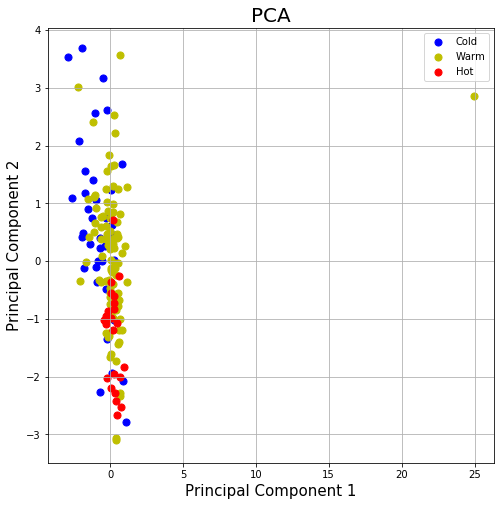

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['Cold', 'Warm', 'Hot']
colors = ['b', 'y', 'r']
for target, color in zip(targets,colors):
    indices = fdf['TEMP'] == target
    ax.scatter(fdf.loc[indices, 'pc1']
               , fdf.loc[indices, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## LDA

In [65]:
bj_df=pd.read_csv("Files\\basefinal.csv")
bj_df.head()

,FECHA,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP
0,2015-01-05,53.0,216.0,1.60,10.0,22.0,26.5,21.0,5.0,0.40,2.0,12.25
1,2015-01-12,62.0,300.0,2.00,7.5,22.0,30.0,23.0,5.0,0.30,2.0,10.65
2,2015-01-19,47.5,208.5,1.55,26.0,29.5,37.0,32.0,3.0,0.45,3.0,13.45
3,2015-01-26,48.0,210.0,1.60,22.5,23.5,32.0,26.5,4.0,0.30,2.0,14.55
4,2015-02-02,42.0,216.0,1.70,11.0,17.0,33.0,25.5,5.0,0.30,3.0,13.25


In [66]:
bj_df['CTEMP']= bj_df['TEMP'].apply(categoriza)

In [67]:
bj_df.head()

,FECHA,HUMEDAD,WDIR,WVEL,PM25,O3,NOX,NO2,NO,CO,SO,TEMP,CTEMP
0,2015-01-05,53.0,216.0,1.60,10.0,22.0,26.5,21.0,5.0,0.40,2.0,12.25,Cold
1,2015-01-12,62.0,300.0,2.00,7.5,22.0,30.0,23.0,5.0,0.30,2.0,10.65,Cold
2,2015-01-19,47.5,208.5,1.55,26.0,29.5,37.0,32.0,3.0,0.45,3.0,13.45,Cold
3,2015-01-26,48.0,210.0,1.60,22.5,23.5,32.0,26.5,4.0,0.30,2.0,14.55,Cold
4,2015-02-02,42.0,216.0,1.70,11.0,17.0,33.0,25.5,5.0,0.30,3.0,13.25,Cold


In [68]:
 bj_df.drop(["TEMP"], inplace = True, axis=1)

In [69]:
from sklearn.preprocessing import StandardScaler
features = bj_df.columns[1:-1]
x = bj_df.loc[:,features].values
y = bj_df.loc[:,"CTEMP"].values
x = StandardScaler().fit_transform(x)

In [70]:
features

Index(['HUMEDAD', 'WDIR', 'WVEL', 'PM25', 'O3', 'NOX', 'NO2', 'NO', 'CO',
       'SO'],
      dtype='object')

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x, y)
lbj_df = pd.DataFrame(data = X_lda, columns = ["LDA1", "LDA2"])

In [72]:
lbj_df.head()

,LDA1,LDA2
0,-0.915701,-1.188622
1,-1.145196,-0.864922
2,-0.544489,-1.175173
3,-0.709558,-1.102506
4,-2.169142,-1.821123


In [73]:
f_lbj_df = pd.concat([lbj_df, bj_df["CTEMP"]], axis=1)
f_lbj_df.head()

,LDA1,LDA2,CTEMP
0,-0.915701,-1.188622,Cold
1,-1.145196,-0.864922,Cold
2,-0.544489,-1.175173,Cold
3,-0.709558,-1.102506,Cold
4,-2.169142,-1.821123,Cold


In [74]:
lda.explained_variance_ratio_

array([0.70862331, 0.29137669])

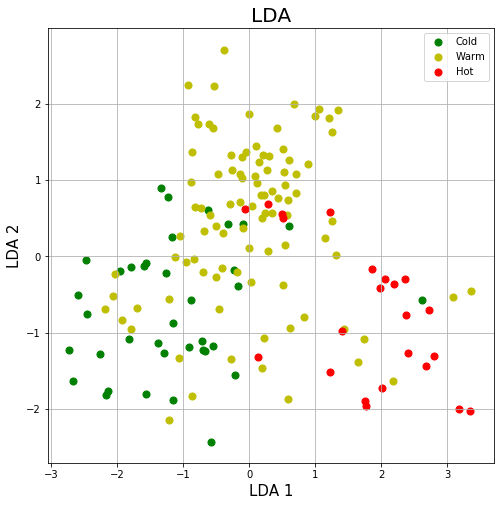

In [76]:
fig= plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('LDA', fontsize = 20)
targets = ['Cold','Warm','Hot']
colors = ['g', 'y', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = f_lbj_df["CTEMP"] == target
    ax.scatter(f_lbj_df.loc[indicesToKeep, 'LDA1']
               , f_lbj_df.loc[indicesToKeep, 'LDA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()